[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Asset returns: 0.04997144314676483
Average returns: 0.005707343150931402
Standard Deviation: 0.02946567403415206
Sharpe ratio: -0.8244392041027909
Sortino Ratio: -1.5706214565629404
Beta 1.0375209555355385


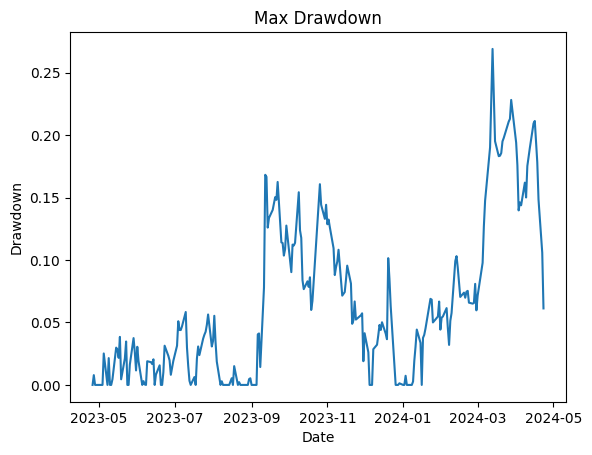

In [20]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import datetime as dt

ticker = "HSCL.NS" # Ticker symbol for the desired asset
benchmark_ticker = "^NSEI" # Ticker symbol for the benchmark index
start_date = dt.datetime.today() - dt.timedelta(days=365) # Start date for obtaining historical price data
end_date = dt.datetime.today() # End date for obtaining historical price data

# Fetch historical price data for the asset and benchmark from a reliable data source
asset_data = yf.download(ticker, start_date, end_date)
benchmark_data = yf.download(benchmark_ticker, start_date, end_date)

# Extract the "close" prices from the data
asset_prices = asset_data["Close"]
benchmark_prices = benchmark_data["Close"]

# Calculate the asset returns and benchmark returns
asset_returns = asset_prices.pct_change().dropna()
benchmark_returns = benchmark_prices.pct_change().dropna()
print("Asset returns:",asset_returns.iloc[-1])

# Calculate the average return
average_return = asset_returns.mean()
print("Average returns:",average_return)

# Standard Deviation
standard_deviation = asset_returns.std()
print("Standard Deviation:",standard_deviation)


# Sharpe Ratio
risk_free_rate = 0.03  # Assume a risk-free rate of 3%
sharpe_ratio = (average_return - risk_free_rate) / standard_deviation
print("Sharpe ratio:",sharpe_ratio)


# Sortino Ratio
downside_returns = asset_returns[asset_returns < 0]
average_downside_return = downside_returns.mean()
sortino_ratio = (average_return - risk_free_rate) / downside_returns.std()
print("Sortino Ratio:",sortino_ratio)


# Beta
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
beta = model.params[1]
print("Beta",beta)

# Max Drowdown
cum_returns = (asset_returns + 1).cumprod()
cum_max = cum_returns.cummax()
drawdown = (cum_max - cum_returns) / cum_max
plt.plot(drawdown)
plt.title('Max Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()
max_drawdown = drawdown.max()

# Value at Risk (VaR)
confidence_level = 0.95
var = np.percentile(asset_returns, 100 - confidence_level * 100)

# Conditional Value at Risk (CVaR)
tail_returns = asset_returns[asset_returns < var]
cvar = tail_returns.mean()

# R-squared
model = sm.OLS(asset_returns, sm.add_constant(benchmark_returns)).fit()
r_squared = model.rsquared